In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, make_scorer
import numpy as np
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('archivo.csv')

In [3]:
df

,main_category,subcategory,loc_state,loc_name,goal,state,face.like,face_followers,youtube_videos,youtube_subscriptors,youtube_views,instagram_followers,twitter_followers,PCE,dif_launch_end,dif_create_end,dif_create_launch
0,Journalism,Photo,NaN,NaN,2000,successful,0,0,0,0,0,0,0,47915,89,90,1
1,Comics,Webcomics,AK,Kenai,7500,failed,0,0,56,5,3256,0,0,54331,23,41,18
2,Publishing,Literary Spaces,AK,Juneau,5000,successful,0,1771,0,0,0,0,0,54331,30,74,44
3,Comics,Webcomics,AK,Anchorage,500,failed,0,0,0,0,0,0,61,54331,30,43,13
4,Comics,Webcomics,AL,Birmingham,8000,successful,0,0,0,0,0,0,0,39657,60,71,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,Theater,Spaces,WV,Unger,10000,successful,930,5807,0,0,0,0,0,41153,30,44,14
2109,Comics,Webcomics,WV,Wheeling,500,successful,0,0,0,0,0,262,0,41153,15,21,6
2110,Design,Product Design,WY,Sheridan,1000,successful,0,0,0,0,0,0,0,47832,30,34,4
2111,Design,Product Design,WY,Sheridan,10390,successful,1023,1095,0,0,0,0,0,47832,30,69,39


In [4]:
X = df.drop('state', axis=1)
y = df['state']

In [5]:
X_dumm = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_dumm, y, test_size=0.2)

Red Neuronal

Funciona muy mal

Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rfc = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rfc, params, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)

C:\Users\dagun\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [9]:
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred, pos_label='failed')
print(confusion_matrix(y_pred,y_test))
print("F1 score: {:.4f}".format(f1))

[[  3   0]
 [101 319]]
F1 score: 0.0561


Empezamos con unos resultados bastante malos

In [10]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [11]:
grid_search.fit(X_res, y_res)

C:\Users\dagun\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [12]:
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred, pos_label='failed')
print(confusion_matrix(y_pred,y_test))
print("F1 score: {:.4f}".format(f1))

[[ 86  76]
 [ 18 243]]
F1 score: 0.6466


Se mejoran bastante los resultados al tratar los datos imbalanceados

In [6]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import RUSBoostClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score, balanced_accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc


# Definir las diferentes técnicas de sobremuestreo
smote = SMOTE()
adasyn = ADASYN()
ros = RandomOverSampler()
smoteenn = SMOTEENN()
smotetomek = SMOTETomek()

# Definir el modelo de clasificación
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators= 42)

# Definir la cuadrícula de parámetros para la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Definir las diferentes técnicas de sobremuestreo a probar
resamplers = [
    ('SMOTE', smote),
    ('ADASYN', adasyn),
    ('Random Over-Sampling', ros),
    ('SMOTE + ENN', smoteenn),
    ('SMOTE + Tomek Links', smotetomek)
]

# Probar cada técnica de sobremuestreo y ajustar el modelo
for name, resampler in resamplers:
    
    # Dividir los datos en conjunto de entrenamiento y conjunto de prueba
    X_train, X_test, y_train, y_test = train_test_split(X_dumm, y, test_size=0.2,random_state = 30)
    # Sobremuestrear el conjunto de datos
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
    
    
    # Ajustar el modelo con GridSearchCV
    rf.fit(X_resampled, y_resampled)
    
    # Hacer predicciones en el conjunto de prueba y calcular el puntaje F1
    y_pred = rf.predict(X_test)
    f1 = f1_score(y_test, y_pred, pos_label= 'failed')
    
    # Imprimir los resultados
    print(f"{name}:\n\tF1 score: {f1}\n")
    print(confusion_matrix(y_test,y_pred))


SMOTE:
	F1 score: 0.65

[[104  12]
 [100 207]]
ADASYN:
	F1 score: 0.6566265060240964

[[109   7]
 [107 200]]
Random Over-Sampling:
	F1 score: 0.6604938271604939

[[107   9]
 [101 206]]
SMOTE + ENN:
	F1 score: 0.6084507042253522

[[108   8]
 [131 176]]
SMOTE + Tomek Links:
	F1 score: 0.68370607028754

[[107   9]
 [ 90 217]]


El que mejores resultados y más estable es es ADASYN

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dumm, y, test_size=0.2,random_state=42)
clf = RUSBoostClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, pos_label= 'failed')
print(f1)
rf = RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators= 20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, pos_label= 'failed')
print(f1)

0.6387832699619772
0.6037735849056604


ADASYN es el que mejor resultados da, ahora usamos xgboost

In [16]:
adasyn = ADASYN()
X_train, X_test, y_train, y_test = train_test_split(X_dumm, y, test_size=0.2,random_state = 30)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train_encoded)
rf = DecisionTreeClassifier()
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}
    
tree_grid = GridSearchCV(rf, tree_params, scoring='f1')
tree_grid.fit(X_resampled, y_resampled)

# Obtener los mejores hiperparámetros y el F1-Score correspondiente para el árbol de decisión
best_tree_params = tree_grid.best_params_
tree_f1 = f1_score(y_test_encoded, tree_grid.predict(X_test))
print(best_tree_params,tree_f1)
    
adaboost = AdaBoostClassifier(base_estimator=tree_grid)
adaboost.fit(X_resampled, y_resampled)
y_pred = adaboost.predict(X_test)
f1 = f1_score(y_test_encoded, y_pred, pos_label= 0)
acc = accuracy_score(y_test_encoded, y_pred)
cm = confusion_matrix(y_test_encoded, y_pred)
bal_acc = balanced_accuracy_score(y_test_encoded, y_pred)
print("F1:", f1)
print("Accuracy:", acc)
print('Bal. Accuracy:',bal_acc)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'} 0.8061224489795918


ValueError: NoneType doesn't support sample_weight.

In [18]:
adaboost = AdaBoostClassifier(base_estimator=tree_grid)
adaboost.fit(X_resampled, y_resampled)

ValueError: NoneType doesn't support sample_weight.

El modelo no baja de 80% de accuracy, y tampoco de un 70% de F1

Quedaría interpretar el modelo: ideas -> pdp...

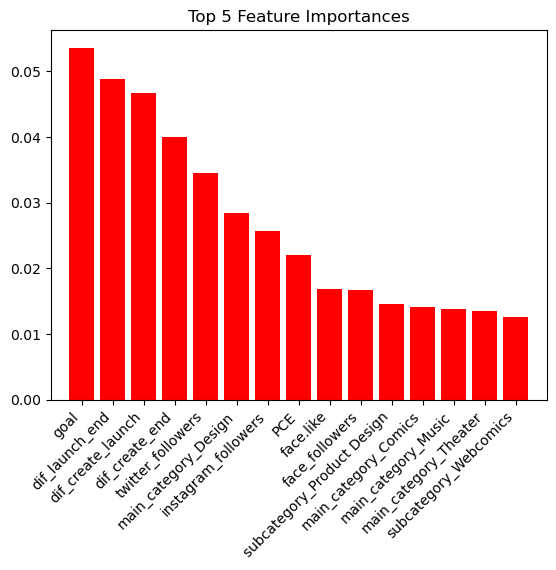

In [29]:
feature_names = list(X_train.columns)
# Obtener la importancia de las características
importances = adaboost.feature_importances_

# Ordenar las características por su importancia
indices = np.argsort(importances)[::-1]

# Imprimir la importancia de cada característica
# for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Graficar la importancia de las características
num_car = 15
plt.figure()
plt.title("Top 5 Feature Importances")
plt.bar(range(num_car), importances[indices][:num_car], color="r", align="center")
plt.xticks(range(num_car), [feature_names[i] for i in indices[:num_car]], rotation=45, ha="right")
plt.xlim([-1, num_car])
plt.show()

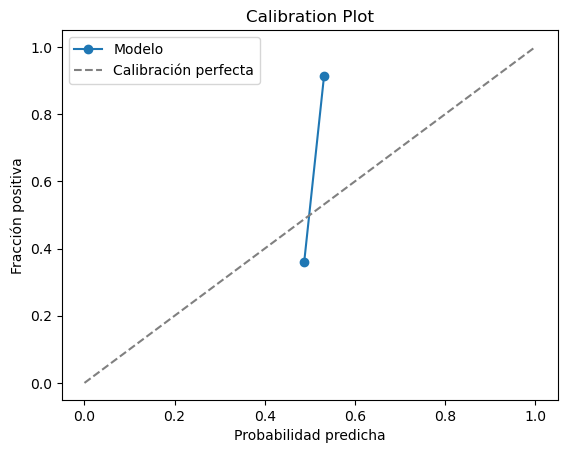

In [44]:
probs = adaboost.predict_proba(X_test)[:, 1]

# Calcular la curva de calibración
fracciones, predicciones = calibration_curve(y_test_encoded, probs, n_bins=10)

# Graficar el calibration plot
plt.plot(predicciones, fracciones, marker='o', linestyle='-', label='Modelo')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Calibración perfecta')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Fracción positiva')
plt.legend()
plt.title('Calibration Plot')
plt.show()

In [65]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report

modelo_calibrado = CalibratedClassifierCV(adaboost, cv='prefit', method='isotonic')
modelo_calibrado.fit(X_resampled, y_resampled)

CalibratedClassifierCV(cv='prefit',
                       estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                                                          n_estimators=20),
                                                    random_state=42),
                       method='isotonic')

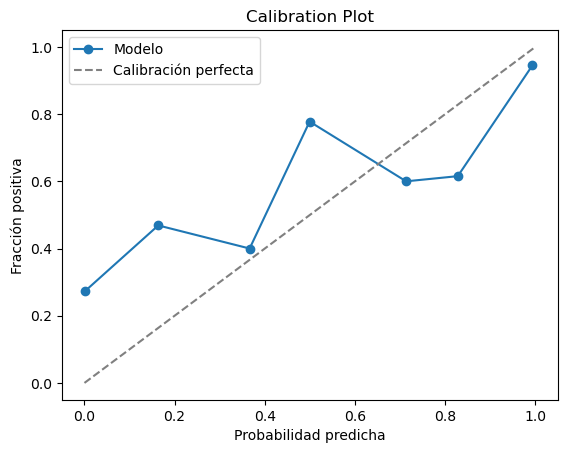

In [66]:
probs = modelo_calibrado.predict_proba(X_test)[:, 1]
predicciones_calibradas = modelo_calibrado.predict(X_test)

# Calcular la curva de calibración
fracciones, predicciones = calibration_curve(y_test_encoded, probs, n_bins=10)

# Graficar el calibration plot
plt.plot(predicciones, fracciones, marker='o', linestyle='-', label='Modelo')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Calibración perfecta')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Fracción positiva')
plt.legend()
plt.title('Calibration Plot')
plt.show()

In [60]:
print("Informe de clasificación del modelo calibrado:")
print(classification_report(y_test_encoded, predicciones_calibradas))

Informe de clasificación del modelo calibrado:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       116
           1       0.91      0.84      0.87       307

    accuracy                           0.82       423
   macro avg       0.78      0.81      0.79       423
weighted avg       0.84      0.82      0.83       423



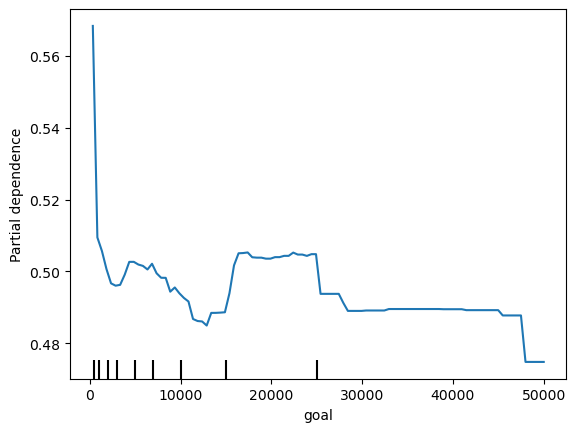

In [72]:
PartialDependenceDisplay.from_estimator(modelo_calibrado, X_resampled, [0])

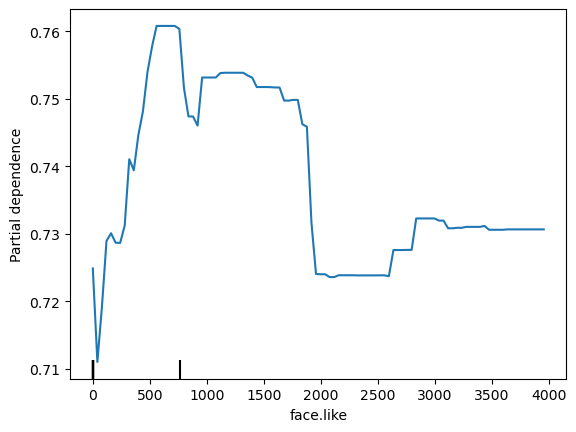

In [73]:
PartialDependenceDisplay.from_estimator(modelo_calibrado, X_dumm, [1])

In [30]:
!pip install eli5
import eli5

  Using cached eli5-0.13.0-py2.py3-none-any.whl
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [29]:
pip 
import iml

ModuleNotFoundError: No module named 'iml'